**Métodos de Previsão Aplicados @ MADSAD - CBS|ISCAC (2022/2023)**

**Trabalho - Parte 1 (25%)**

*Entregáveis:* 
1. este *notebook* resolvido (com **código e comentários** para cada uma das tarefas 2 a 7)
2. ficheiro csv de dados

*Submissão* até **22/03/2023 às 23:59** no InforEstudante

Grupo 17:
* Luís Coimbra ( 2018073846 ) 


# _1. Contexto

<img src='https://www.bicycle-data.de/wp-content/uploads/2020/09/Logo_mitText-1024x375.png' width='120'> </br>
Os dados que vão ser trabalhados são as **contagens das passagens de bicicletas** numa localização exata na Europa ([Schering e Gómez, 2022, subsecção 2.1](https://doi.org/10.1016/j.trpro.2021.12.055)) e que são disponibilizados em [Bicycle Data](https://www.bicycle-data.de/), como dados abertos$^1$ (sob a licença [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)).

Estes dados são recolhidos por equipamentos chamados **contadores automáticos**, que, na sua grande maioria, são equipamentos da empresa [Eco Counters](https://pt.eco-counter.com/), como os exibidos [aqui](https://pt.eco-counter.com/especialidade/monitoramento-de-ciclistas/).


$^1$ Entre 4 e 10 de março de 2023, comemora-se o(s) [***Open Data Day(s)***](https://opendataday.org/).

<img src='https://boost.up.pt/wp-content/uploads/2019/01/SDG-ECF.png' width='80'> </br>
> **Tarefa 1:** Em três frases, relacionem os dados que vão tratar com **um** dos [objetivos de desenvolvimento sustentável](https://unric.org/en/sustainable-development-goals-cycling/) (ODS ou SDG, do inglês *sustainable development goals*) para justificar a relevância da sua análise.

Referências:
* [KnowSDGs (Knowledge base for the Sustainable Development Goals), European Commission](https://knowsdgs.jrc.ec.europa.eu/)
* [Cycling and Sustainable Development Goals, United Nations (UN)](https://unric.org/en/sustainable-development-goals-cycling/)

**Resposta 1:**

### Goal 3: Good health and well-being

Com a análise dos dados que nos são facultados, podemos entender que o principal objetivo deste estudo passa por perceber o quão frequente a população utiliza outros meios de transportes que são mais amigáveis ao ambiente, mais concretamente as bicicletas.
É importante perceber, que existem uma série de vantagens da utilização de alternativas destes meios, desde vantagens para o desenvolvimento do corpo, vantagens para a saúde (coração, apanhar mais sol) e, muitas vezes ignorado, as vantagens psicológicas.
Existem vários estudos realizados, que demonstram que a prática de exercício físico gera uma série de benefícios , sejam estes realizados em ginásio, desportos, aulas de grupo ou mesmo o andar de bicicleta. Dado isto, com a análise dos dados podemos perceber se esta última prática passa por ser algo comum na cidade escolhida.





# _2. Dados

Em [Open Bicycle’s Data](https://www.bicycle-data.de/bicycles-data/):
* em *choose kind*, selecionar ***Counting Data***
* em *choose region*, selecionar **uma** cidade/região (ℹ tem informação sobre o período temporal disponível)
* manter a *start date* e *end date* sugeridas, já que vão dar o maior período temporal disponível (ℹ volta a ter informação sobre o período temporal disponível)
* em *choose location*, selecionar **uma** localização
* em *choose attributes*, selecionar ***bothDirections*** e ***classification*** (ℹ tem informação sobre as variáveis disponíveis, sendo a informação dada em grupos de variáveis)
* em *choose the data format*, selecionar **csv**
* finalmente, clicar em ***Generate Data***

Para ajudar a escolher, consultar o ficheiro `bicycle_datasets_info.xlsx` fornecido no InforEstudante.

> **Tarefa 2:** Selecionar e fazer o *download* do ficheiro de dados. </br>
**⚠ Este conjunto tem que ter, no mínimo, dois anos de dados. Cada grupo tem que escolher um conjunto de dados diferente.** </br> 
O ficheiro csv é submetido juntamente com o *notebook*.

Como foi pedido na tarefa anterior , foram recolhidos os dados da cidade de "Berlin" com o contador "27-RE-MAR"
Através da análise dos valores gerados pode-se confirmar que estes iniciam-se desde o dia de 01-01-2017 e acabam em 30-06-2020 , confirmando-se assim um dos parametros pedidos de mínimo de dois anos de dados.

# _3. Importar os dados

> **Tarefa 3:** Importar os dados para o Colab como `dataframe` do Python, fazer a primeira inspeção e, se necessário, corrigir os formatos (i.e., `Dtypes`).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf

In [ ]:
read = pd.read_csv("/content/data_2017-01-01T00_00_00-2020-06-30T23_45_00_Berlin.csv")


In [ ]:
df=pd.DataFrame(read)
display(df)

,start,end,bothDirections,classification,station
0,2017-01-01 00:00:00,2017-01-01 00:15:00,0,Windy,27-RE-MAR
1,2017-01-01 00:15:00,2017-01-01 00:30:00,1,Windy,27-RE-MAR
2,2017-01-01 00:30:00,2017-01-01 00:45:00,0,Windy,27-RE-MAR
3,2017-01-01 00:45:00,2017-01-01 01:00:00,1,Windy,27-RE-MAR
4,2017-01-01 01:00:00,2017-01-01 01:15:00,1,Windy,27-RE-MAR
...,...,...,...,...,...
122565,2020-06-30 22:45:00,2020-06-30 23:00:00,8,Warm,27-RE-MAR
122566,2020-06-30 23:00:00,2020-06-30 23:15:00,7,Windy,27-RE-MAR
122567,2020-06-30 23:15:00,2020-06-30 23:30:00,9,Windy,27-RE-MAR
122568,2020-06-30 23:30:00,2020-06-30 23:45:00,9,Windy,27-RE-MAR


In [ ]:
df.head(5)

,start,end,bothDirections,classification,station
0,2017-01-01 00:00:00,2017-01-01 00:15:00,0,Windy,27-RE-MAR
1,2017-01-01 00:15:00,2017-01-01 00:30:00,1,Windy,27-RE-MAR
2,2017-01-01 00:30:00,2017-01-01 00:45:00,0,Windy,27-RE-MAR
3,2017-01-01 00:45:00,2017-01-01 01:00:00,1,Windy,27-RE-MAR
4,2017-01-01 01:00:00,2017-01-01 01:15:00,1,Windy,27-RE-MAR


In [ ]:
df.tail(5)

,start,end,bothDirections,classification,station
122565,2020-06-30 22:45:00,2020-06-30 23:00:00,8,Warm,27-RE-MAR
122566,2020-06-30 23:00:00,2020-06-30 23:15:00,7,Windy,27-RE-MAR
122567,2020-06-30 23:15:00,2020-06-30 23:30:00,9,Windy,27-RE-MAR
122568,2020-06-30 23:30:00,2020-06-30 23:45:00,9,Windy,27-RE-MAR
122569,2020-06-30 23:45:00,2020-07-01 00:00:00,3,Windy,27-RE-MAR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122570 entries, 0 to 122569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   start           122570 non-null  object
 1   end             122570 non-null  object
 2   bothDirections  122570 non-null  int64 
 3   classification  122570 non-null  object
 4   station         122570 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
# Com a interpretação do resultado anterior podemos perceber que é necessário corrigir o formato (Dtype)
# que se encontra em object para datatime64[ns].Dado isto , é necessário aplicar a seguinte linha de código.


df=pd.read_csv("/content/data_2017-01-01T00_00_00-2020-06-30T23_45_00_Berlin.csv",parse_dates=["start","end"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122570 entries, 0 to 122569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   start           122570 non-null  datetime64[ns]
 1   end             122570 non-null  datetime64[ns]
 2   bothDirections  122570 non-null  int64         
 3   classification  122570 non-null  object        
 4   station         122570 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.7+ MB


# _4. Verificar os *timestamps* nas mudanças para o horário de Verão e de Inverno

[Table of transition dates for European Summer Time](https://en.wikipedia.org/wiki/Summer_time_in_Europe)

| Start | End |
|::---:|:---:|
| 26 March 2017 | 29 October 2017 |
| 25 March 2018 | 28 October 2018 |
| 31 March 2019 | 27 October 2019 |
| 29 March 2020 | 25 October 2020 |
| 28 March 2021 | 31 October 2021 |
| 27 March 2022 | 30 October 2022 |
| 26 March 2023 | 29 October 2023 |

In all locations in Europe where summer time is observed (the EU, EFTA and associated countries), European Summer Time begins at 01:00 UTC/WET (02:00 CET, 03:00 EET) on the last Sunday in March and ends at 01:00 UTC (02:00 WEST, 03:00 CEST, 04:00 EEST) on the last Sunday in October each year; i.e. the change is made at the same absolute time across all time zones.

> **Tarefa 4:** Analisar o que acontece aos *timestamps* nas mudanças de horário de Verão, em março (em que se perde uma hora), e de Inverno, em outubro (em que se ganha uma hora).

In [ ]:
# De modo a realizar esta pergunta decidi utilizar o método de query , do qual apliquei determinadas condições, sendo estas a escolha
# do tempo necessário para perceber o timestamp da mudança de hora(1:45:00 e 03:00:00) que se inicia às 02:00.Podemos verificar que existe
# perda de uma hora nos dias indicados de março e ganho de uma hora nos dias de outubro.
# Dado que os meus dados iniciam-se em 01-01-2017 e acabam em 30-06-2020, foram apenas utilizados os dias de mudança de hora desse periodo.

# Nos horários de outubro podemos interpretar que o programa refaz os registos dessa hora e escreve "por cima " dos existentes.


df.set_index('start', inplace=True)

In [ ]:
df.query('"2017-03-26 01:45:00" <= index <= "2017-03-26 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2017-03-26 01:45:00,2017-03-26 02:00:00,2,Cold,27-RE-MAR
2017-03-26 03:00:00,2017-03-26 03:15:00,0,Cold,27-RE-MAR


In [ ]:
df.query('"2017-10-29 01:45:00" <= index <= "2017-10-29 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2017-10-29 01:45:00,2017-10-29 02:00:00,1,Stormy,27-RE-MAR
2017-10-29 02:00:00,2017-10-29 02:15:00,2,Stormy,27-RE-MAR
2017-10-29 02:15:00,2017-10-29 02:30:00,2,Stormy,27-RE-MAR
2017-10-29 02:30:00,2017-10-29 02:45:00,3,Stormy,27-RE-MAR
2017-10-29 02:45:00,2017-10-29 03:00:00,0,Stormy,27-RE-MAR
2017-10-29 03:00:00,2017-10-29 03:15:00,1,Stormy,27-RE-MAR


In [ ]:
df.query('"2018-03-25 01:45:00" <= index <= "2018-03-25 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2018-03-25 01:45:00,2018-03-25 02:00:00,0,Cold,27-RE-MAR
2018-03-25 03:00:00,2018-03-25 03:15:00,0,Cold,27-RE-MAR


In [ ]:
df.query('"2018-10-28 01:45:00" <= index <= "2018-10-28 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2018-10-28 01:45:00,2018-10-28 02:00:00,1,Cold,27-RE-MAR
2018-10-28 02:00:00,2018-10-28 02:15:00,0,Cold,27-RE-MAR
2018-10-28 02:15:00,2018-10-28 02:30:00,3,Cold,27-RE-MAR
2018-10-28 02:30:00,2018-10-28 02:45:00,1,Cold,27-RE-MAR
2018-10-28 02:45:00,2018-10-28 03:00:00,3,Cold,27-RE-MAR
2018-10-28 03:00:00,2018-10-28 03:15:00,1,Cold,27-RE-MAR


In [ ]:
df.query('"2019-03-31 01:45:00" <= index <= "2019-03-31 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2019-03-31 01:45:00,2019-03-31 02:00:00,1,Cold,27-RE-MAR
2019-03-31 03:00:00,2019-03-31 03:15:00,0,Cold,27-RE-MAR


In [ ]:
df.query('"2019-10-27 01:45:00" <= index <= "2019-10-27 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2019-10-27 01:45:00,2019-10-27 02:00:00,1,Windy,27-RE-MAR
2019-10-27 02:00:00,2019-10-27 02:15:00,3,Windy,27-RE-MAR
2019-10-27 02:15:00,2019-10-27 02:30:00,5,Windy,27-RE-MAR
2019-10-27 02:30:00,2019-10-27 02:45:00,4,Windy,27-RE-MAR
2019-10-27 02:45:00,2019-10-27 03:00:00,3,Windy,27-RE-MAR
2019-10-27 03:00:00,2019-10-27 03:15:00,0,Windy,27-RE-MAR


In [ ]:
df.query('"2020-03-29 01:45:00" <= index <= "2020-03-29 03:00:00"')

,end,bothDirections,classification,station
start,,,,
2020-03-29 01:45:00,2020-03-29 02:00:00,5,Cold,27-RE-MAR
2020-03-29 03:00:00,2020-03-29 03:15:00,3,Cold,27-RE-MAR


# _5. Verificar a completude dos *timestamps*

> **Tarefa 5:** Verificar se os dados estão completos, concretamente, atendendo à periodicidade dos dados, verificar se não faltam *timestamps* e se a periodicidade é respeitada.

In [ ]:
# Dado que as colunas de "end" e "station" não são necessárias decidi retirá-las para uma maior facilidade de compreensão.
df.drop(columns=["end","station"])

,bothDirections,classification
start,,
2017-01-01 00:00:00,0,Windy
2017-01-01 00:15:00,1,Windy
2017-01-01 00:30:00,0,Windy
2017-01-01 00:45:00,1,Windy
2017-01-01 01:00:00,1,Windy
...,...,...
2020-06-30 22:45:00,8,Warm
2020-06-30 23:00:00,7,Windy
2020-06-30 23:15:00,9,Windy


In [ ]:
#Primeiro de modo a perceber se existem diferenças de valores nos timestamps , realizou-se a seguinte linha de código.

dif=df.index - df['end']

if (dif == dif.iloc[0]).all():
    print("A diferença entre as linhas é igual")
else:
    print("A diferença entre as linhas é diferente")


A diferença entre as linhas é igual


In [ ]:
#Já indexado , realizar o max - min 
diferença = df.index.max()- df.index.min()

# De seguida é necessário saber quantos timestamps existem num dia (24 horas * 4 timestamps(pois existem 4 timestamps em 1 hora))
x=24*4

numerodedias=diferença.days+1

print("Número de linhas")
y=x*numerodedias
print(y)



Número de linhas
122592


Através do resultado anterior podemos perceber que o pressuposto é que existam cerca de 122592 linhas. De modo  a verificar se existem dados em falta , verifica-se de seguida o número de linhas que o dataset tem.

In [ ]:
print("Número de linhas")
y=x*ndias
print(y)

print("Número de linhas no dataset:")
linhas=len(df)
print(linhas)

print("Número de linhas em falta no dataset:")
falta = y - linhas 
print(falta)
#Com este resultado podemos perceber que existem cerca de 22 dados em falta ( 122592-122570)

Número de linhas
122592
Número de linhas no dataset:
122570
Número de linhas em falta no dataset:
22


# _6. Adicionar *timestamps* em falta

> **Tarefa 6:** Caso existam *timestamps* em falta, acrescentá-los à *dataframe*, preenchendo com `NaN`.

In [ ]:
#De modo a realizar esta pergunta escreveu-se a seguinte linha de código.

df1 = df.asfreq('15min')

#Utilizou-se a função df.asfreq de 15 em 15 minutos pois esta é utilizada como um método de preencher dados com uma frequencia 
#escolhida (15 minutos)

df1.info

# Com o resultado podemos verificar que as linhas em falta foram preenchidas 


<bound method DataFrame.info of                                     end  bothDirections classification  \
start                                                                    
2017-01-01 00:00:00 2017-01-01 00:15:00             0.0          Windy   
2017-01-01 00:15:00 2017-01-01 00:30:00             1.0          Windy   
2017-01-01 00:30:00 2017-01-01 00:45:00             0.0          Windy   
2017-01-01 00:45:00 2017-01-01 01:00:00             1.0          Windy   
2017-01-01 01:00:00 2017-01-01 01:15:00             1.0          Windy   
...                                 ...             ...            ...   
2020-06-30 22:45:00 2020-06-30 23:00:00             8.0           Warm   
2020-06-30 23:00:00 2020-06-30 23:15:00             7.0          Windy   
2020-06-30 23:15:00 2020-06-30 23:30:00             9.0          Windy   
2020-06-30 23:30:00 2020-06-30 23:45:00             9.0          Windy   
2020-06-30 23:45:00 2020-07-01 00:00:00             3.0          Windy   

     

In [ ]:
#De seguida são demonstrados os dias que apresentam valores em falta

falta = df1.isna().any(axis=1)
print(df1[falta])

                    end  bothDirections classification station
start                                                         
2017-03-26 02:00:00 NaT             NaN            NaN     NaN
2017-03-26 02:15:00 NaT             NaN            NaN     NaN
2017-03-26 02:30:00 NaT             NaN            NaN     NaN
2017-03-26 02:45:00 NaT             NaN            NaN     NaN
2017-12-31 23:15:00 NaT             NaN            NaN     NaN
2017-12-31 23:30:00 NaT             NaN            NaN     NaN
2017-12-31 23:45:00 NaT             NaN            NaN     NaN
2018-03-25 02:00:00 NaT             NaN            NaN     NaN
2018-03-25 02:15:00 NaT             NaN            NaN     NaN
2018-03-25 02:30:00 NaT             NaN            NaN     NaN
2018-03-25 02:45:00 NaT             NaN            NaN     NaN
2018-12-31 23:15:00 NaT             NaN            NaN     NaN
2018-12-31 23:30:00 NaT             NaN            NaN     NaN
2018-12-31 23:45:00 NaT             NaN            NaN 

# _7. Visualizar os dados com diferentes periodicidades

> **Tarefa 7:** Produzir os gráficos para a série das contagens com periodicidades diária, semanal e mensal. 

In [ ]:
plt.rcParams['figure.figsize'] = (13, 7)

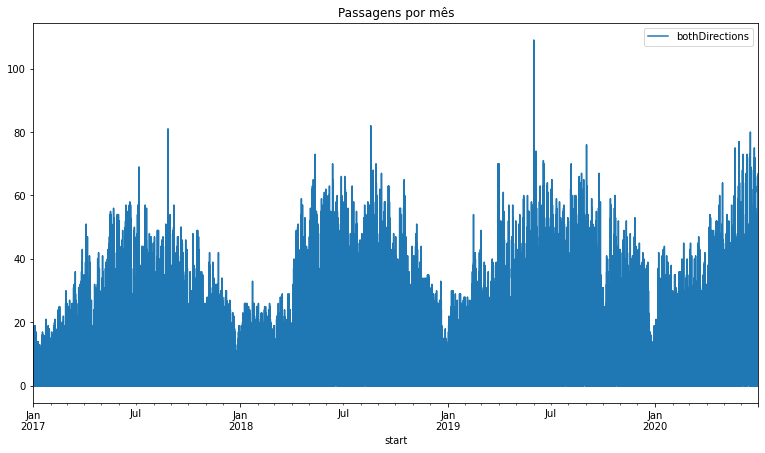

In [ ]:
df1.plot(y='bothDirections', title='Passagens por mês');

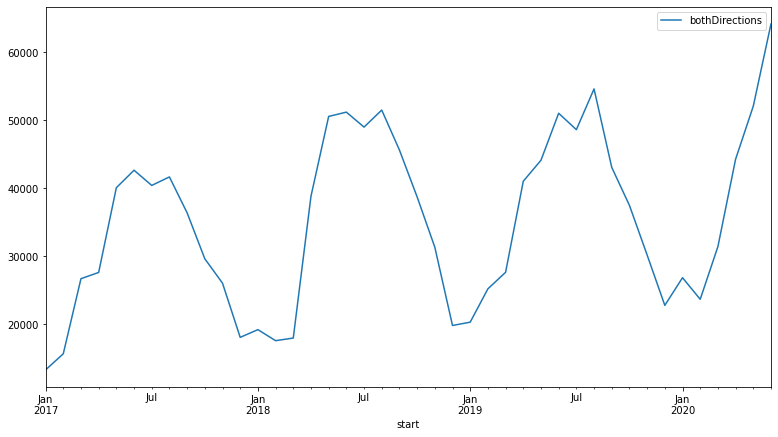

In [ ]:
# Gráfico Mensal

df1.resample('m').sum().plot(y='bothDirections');


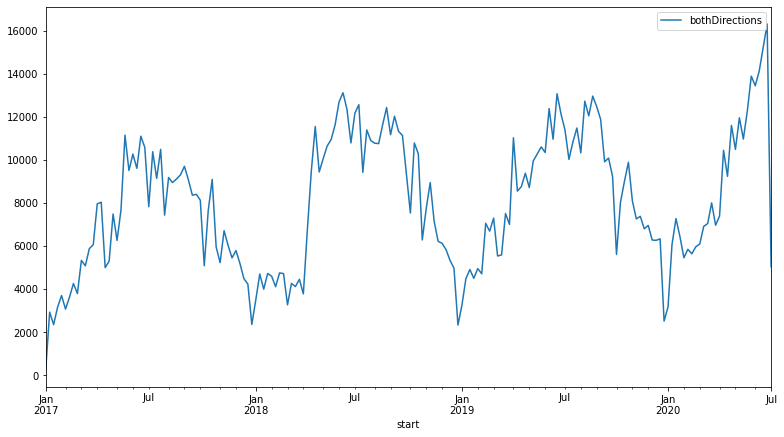

In [ ]:
#Gráfico Semanal

df1.resample('W').sum().plot(y='bothDirections');

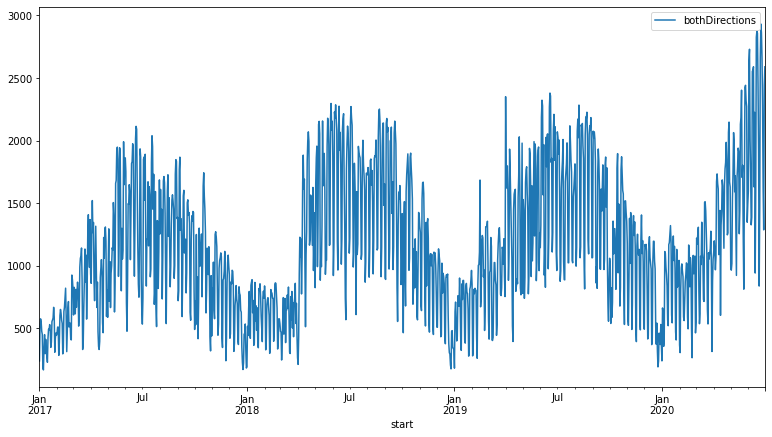

In [ ]:
#Gráfico Diário

df1.resample('d').sum().plot(y='bothDirections');

Com a interpretação dos gráficos gerados podemos concluir que a passagem de bicicletas é mais ativa em períodos de calor , algo que era esperado devido a ser um periodo de maior atividade por parte da população